In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

# Load the data into a pandas dataframe
df = pd.read_csv('Data/world_emission_data.csv', index_col=0)

df.head()


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
China,1.157095e+07,1.190633e+07,1.293910e+07,1.529014e+07,1.758384e+07,1.895785e+07,2.185477e+07,2.358888e+07,2.511006e+07,2.642913e+07,...,3.030994e+07,3.057786e+07,3.203339e+07,3.125201e+07,3.217351e+07,3.214367e+07,3.289873e+07,3.369415e+07,3.452932e+07,34981373
United States of America,1.611190e+07,1.568319e+07,1.584672e+07,1.590616e+07,1.640218e+07,1.638388e+07,1.603512e+07,1.633367e+07,1.578539e+07,1.467166e+07,...,1.451416e+07,1.388166e+07,1.430234e+07,1.446727e+07,1.431448e+07,1.468211e+07,1.467840e+07,1.515718e+07,1.478525e+07,13717065
India,2.775164e+06,3.982551e+06,4.047847e+06,4.235793e+06,4.473785e+06,4.666517e+06,4.948438e+06,5.190788e+06,5.624294e+06,6.198109e+06,...,6.267149e+06,6.844612e+06,7.269164e+06,7.951530e+06,8.150568e+06,8.234299e+06,8.845354e+06,9.266325e+06,9.341812e+06,8690366
Indonesia,7.140926e+06,2.954726e+06,5.820661e+06,3.795938e+06,5.956901e+06,4.579783e+06,6.973688e+06,3.705025e+06,3.817228e+06,5.953203e+06,...,7.355035e+06,7.652254e+06,7.223950e+06,9.138751e+06,1.045705e+07,5.950599e+06,5.651937e+06,7.009602e+06,8.554756e+06,5376260
Democratic Republic of the Congo,2.780118e+06,2.779877e+06,2.780221e+06,2.781563e+06,2.781343e+06,2.782289e+06,2.773726e+06,2.780608e+06,2.801921e+06,2.810066e+06,...,4.221188e+06,4.220122e+06,4.224023e+06,4.228015e+06,4.221702e+06,4.219106e+06,4.220464e+06,4.222001e+06,4.222186e+06,4221552


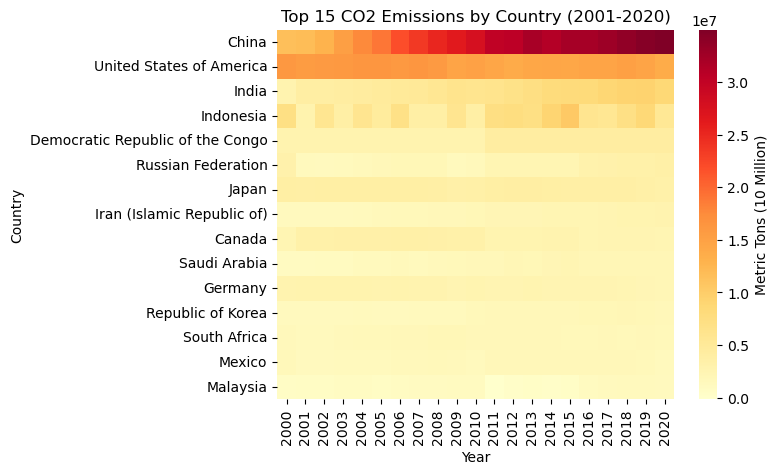

In [2]:
heatmap = sns.heatmap(
                    df,
                    cmap='YlOrRd',
                    #norm=LogNorm(),
                    linecolor='#D2B48C',
                    cbar_kws={'label': 'Metric Tons (10 Million)'}
                    ).set(
                        xlabel="Year",
                        title="Top 15 CO2 Emissions by Country (2001-2020)"
                        )

plt.savefig("Visual/Q4_Fig_1-Emissions_by_Country.png")

plt.show()

In [3]:
df_pie = pd.read_csv('Data/world_emission_data_pie.csv', index_col=0)

df_pie

,2020
Country,
China,0.390500
United States of America,0.153125
India,0.097011
Indonesia,0.060016
Democratic Republic of the Congo,0.047126
Russian Federation,0.040694
Japan,0.037552
Iran (Islamic Republic of),0.031086
Canada,0.026273


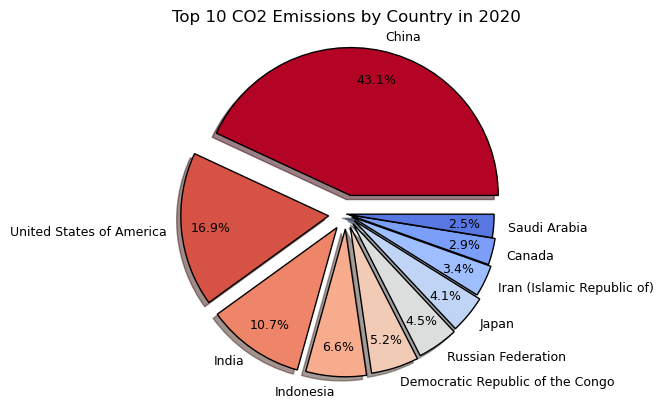

In [4]:
explode = [0.13, 0.12, 0.11, 0.10, 0.09, 0.08, 0.07, 0.04, 0.02, 0]
colors = plt.cm.coolwarm_r([i/len(df_pie) for i in range(len(df_pie))])

fig, ax = plt.subplots()
ax.pie(
    df_pie['2020'],
    labels=df_pie.index,
    autopct='%1.1f%%',
    explode=explode,
    colors=colors,
    shadow=True,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
    textprops={'fontsize': 9},
    pctdistance=0.8
      )

# Set the title
ax.set_title('Top 10 CO2 Emissions by Country in 2020')

plt.savefig("Visual/Q4_Fig_2-Emissions_Pie.png")

# Show the chart
plt.show()

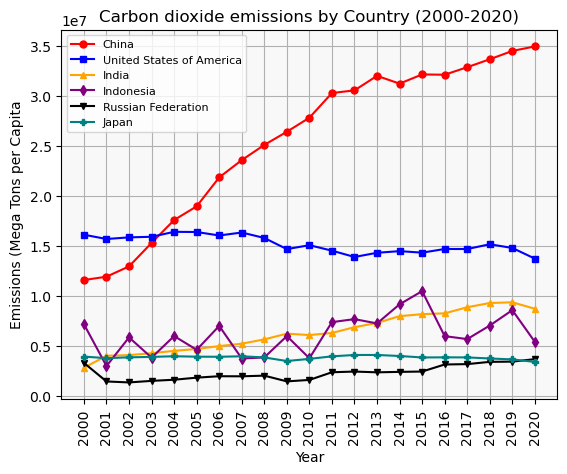

In [5]:
# Read the data from a CSV file
df_graph = pd.read_csv('Data/world_emission_data.csv', index_col='Country')

# Select the rows for the desired countries
countries = ['China', 'United States of America', 'India', 'Indonesia', 'Russian Federation', 'Japan']
markers = ['o', 's', '^', 'd', 'v', 'P']
colors = ['red', 'blue', 'orange', 'purple', 'black', 'teal']
df_graph = df_graph.loc[countries]

# Transpose the dataframe so that the years are the index
df_graph = df_graph.T

# Create a line plot for each country
fig, ax = plt.subplots()
for i, country in enumerate(countries):
    ax.plot(df_graph.index, df_graph[country], label=country, color=colors[i], marker=markers[i], markersize=5)

# Set the x-axis label and tick labels
ax.set_xlabel("Year")
ax.set_xticks(df_graph.index)
ax.set_xticklabels(df_graph.index, rotation=90)

# Light grey background
ax.set_facecolor('#F8F8F8')

# Set the y-axis label
ax.set_ylabel("Emissions (Mega Tons per Capita")

# Add a legend
ax.legend(fontsize='8')

# Set the title
ax.set_title("Carbon dioxide emissions by Country (2000-2020)")

# Show the plot
ax.grid()
plt.savefig("Visual/Q4_Fig_3-Emissions_Over_Time.png")
plt.show()